<a href="https://colab.research.google.com/github/HollowMike8/semantic-segmentation/blob/main/segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/HollowMike8/semantic-segmentation.git

In [57]:
path_dir: str = r"/content/semantic-segmentation"

# path to classes and colors
classes_path = os.path.join(path_dir, 'enet-cityscapes/enet-classes.txt')
colors_path = os.path.join(path_dir, 'enet-cityscapes/enet-colors.txt')

# path to ENet
enet_path = os.path.join(path_dir, 'enet-cityscapes/enet-model.net')

# no. of test images
images = os.listdir(os.path.join(path_dir, 'images'))

In [118]:
classes = open(classes_path, "r").read().strip().split("\n")
colors = open(colors_path, "r").read().strip().split("\n")
colors = [np.array(c.split(",")).astype("int") for c in colors]
colors = np.array(colors, dtype="uint8")

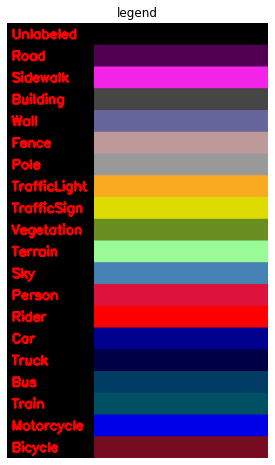

In [51]:
# initialize the legend visualization
legend = np.zeros(((len(classes) * 25), 300, 3), dtype="uint8")

for i, (color_, class_) in enumerate(zip(colors, classes)):
  color_ = [int(c) for c in color_]
  cv2.putText(legend, class_, (5, (i * 25) + 17), 
              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
  cv2.rectangle(legend, (100, (i * 25)), (300, (i * 25) + 25), tuple(color_), -1 )

# plot the legend
plt.figure(figsize = (12,8))
plt.imshow(legend)
plt.title("legend")
plt.axis("off")
plt.show()

In [133]:
# load the ENet model
net = cv2.dnn.readNet(enet_path)
print("ENet successfully loaded !!")

ENet successfully loaded !!


There are 4 images available for testing
Do you want to choose the test image randomly?
Yes/No :Yes


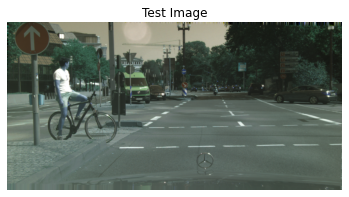

Time taken for computation is 0.6593 seconds


In [134]:
# choose a test image
print("There are %s images available for testing"% len(images))
print("Do you want to choose the test image randomly?")
ans = input("Yes/No :")

if ans=='No':
  print("\n")
  print("Please choose the test image")
  print("Allowed formats: example_01.png")
  img_name = input("Test image name:")
  image = cv2.imread(os.path.join(path_dir, 'images', img_name))
else:
  index = np.random.randint(0, len(images))
  image = cv2.imread(os.path.join(path_dir, 'images', images[index]))

# plot the test image
plt.imshow(image)
plt.title("Test Image")
plt.axis("off")
plt.show()

# perform a forward pass on test image using ENet
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (1024, 512), 0, 
                             swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
output = net.forward()
end = time.time()

print("Time taken for computation is {:.4f} seconds".format(end - start))

In [135]:
# infer the total number of classes along with dims of the mask
(numClasses, height, width) = output.shape[1:4]

# use argmax to filter out classes with the max probability for every pixel
classMap = np.argmax(output[0], axis=0)

# create a mask each of the classes to its corresponding color
mask = colors[classMap]
mask = cv2.resize(mask, (image.shape[1], image.shape[0]),
                  interpolation=cv2.INTER_NEAREST)

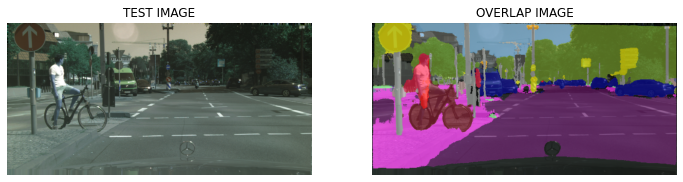

In [140]:
# overlap the test image with the mask
overlap = cv2.addWeighted(image, 0.4, mask, 0.7, 0)

#plot the original test image and overlap
list_images = (image, overlap)
list_titles = ('TEST IMAGE', 'OVERLAP IMAGE')
  
fig = plt.figure(figsize = (12,8))
for n, (img, title) in enumerate(zip(list_images, list_titles)):
    a = fig.add_subplot(2, 2, n + 1)
    plt.axis("off")
    plt.imshow(img)
    a.set_title(title)
plt.show()